<a href="https://colab.research.google.com/github/omars1234/DeepLearning_RNN/blob/main/NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import nltk
from nltk import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

In [52]:
df=pd.read_csv(r"/content/file10000.csv")
df.head()


,Unnamed: 0,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
df=df[["review","sentiment"]]

In [54]:
df["sentiment"].value_counts()

,count
sentiment,
positive,5028
negative,4972


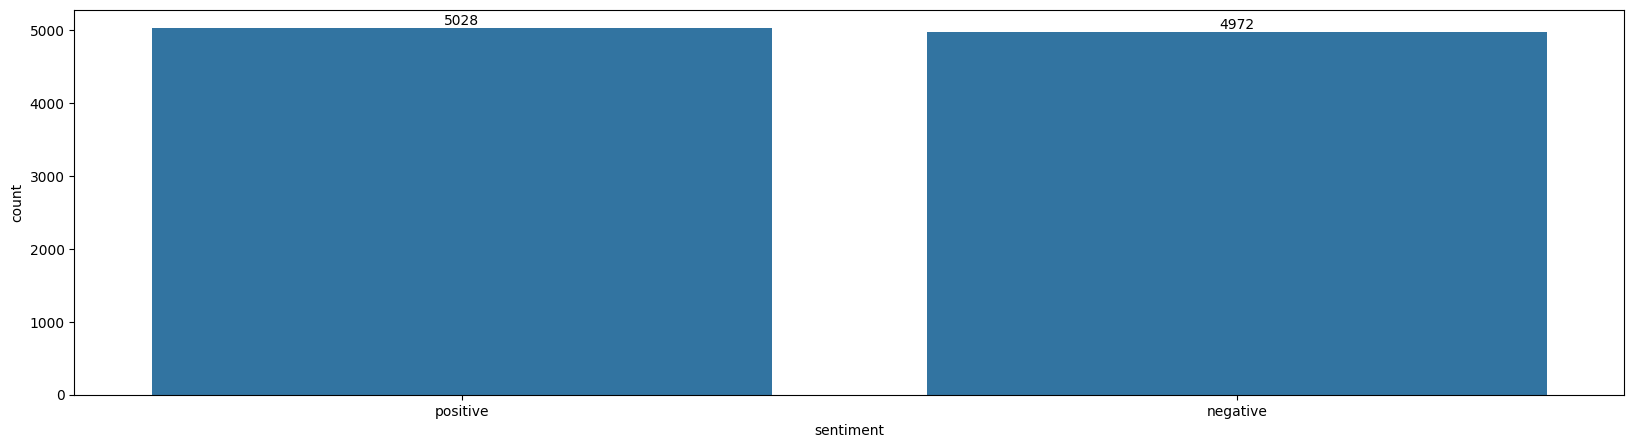

In [56]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df,x="sentiment")
for label in ax.containers:
         ax.bar_label(label);

In [57]:
!pip install nltk

In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import  stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import re
from tqdm import tqdm
sentence_steaming=PorterStemmer()
curpos=[]
for i  in tqdm(range(0,len(df))):
    review=re.sub("[^a-zA-Z]"," ",df["review"][i])
    review=review.lower()
    review=review.split()
    review=[sentence_steaming.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    curpos.append(review)

100%|██████████| 10000/10000 [04:37<00:00, 36.05it/s]


In [75]:
len(curpos)

10000

In [76]:
df["sentiment"].shape

(10000,)

In [77]:
! pip install tensorflow

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,Bidirectional,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer

In [79]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words=50000
max_len=200
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(curpos)
sequences=tokenizer.texts_to_sequences(curpos)
sequences_matrix=pad_sequences(sequences,maxlen=max_len)

In [80]:
y=pd.get_dummies(df["sentiment"])
y=y.applymap(lambda x:1 if x is True else 0 )
y=y.iloc[:,1].values

<ipython-input-80-ec7f4a88fb35>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y=y.applymap(lambda x:1 if x is True else 0 )


In [81]:
len(sequences_matrix)

10000

In [82]:
x=sequences_matrix
y=y

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7500, 200), (2500, 200), (7500,), (2500,))

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,Bidirectional,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop

In [87]:
model=Sequential()
model.add(Embedding(max_words,100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#model.summary()

In [88]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [89]:
history=model.fit(xtrain,ytrain,validation_split=.2,epochs=100,batch_size=128,callbacks=early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 359ms/step - accuracy: 0.5507 - loss: 0.6802 - val_accuracy: 0.8180 - val_loss: 0.4310
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 359ms/step - accuracy: 0.8532 - loss: 0.3622 - val_accuracy: 0.8427 - val_loss: 0.3552
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.9263 - loss: 0.2115 - val_accuracy: 0.8420 - val_loss: 0.3820
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - accuracy: 0.9571 - loss: 0.1371 - val_accuracy: 0.8467 - val_loss: 0.4036
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 417ms/step - accuracy: 0.9808 - loss: 0.0784 - val_accuracy: 0.8420 - val_loss: 0.4687
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 353ms/step - accuracy: 0.9816 - loss: 0.0631 - val_accuracy: 0.8353 - val_loss: 0.5239
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - accuracy: 0.9908 - loss: 0.0371 - val_accuracy: 0.8420 - val_loss: 0.5902
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 354ms/step - accuracy: 0.9896 - loss: 0.0356 - 

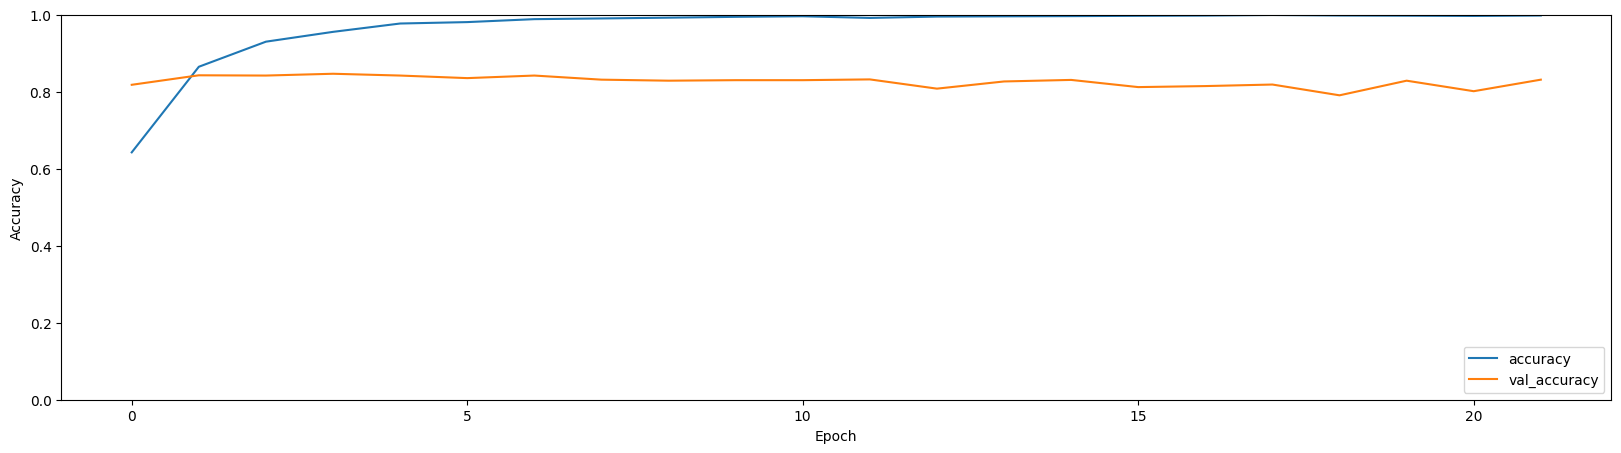

In [95]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [96]:
model.evaluate(xtest,ytest)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8331 - loss: 0.9508


[0.93328857421875, 0.8288000226020813]

In [97]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_predict=model.predict(xtest)
y_predict=np.where(y_predict>.5,1,0)
print(classification_report(ytest,y_predict))

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1220
           1       0.83      0.83      0.83      1280

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



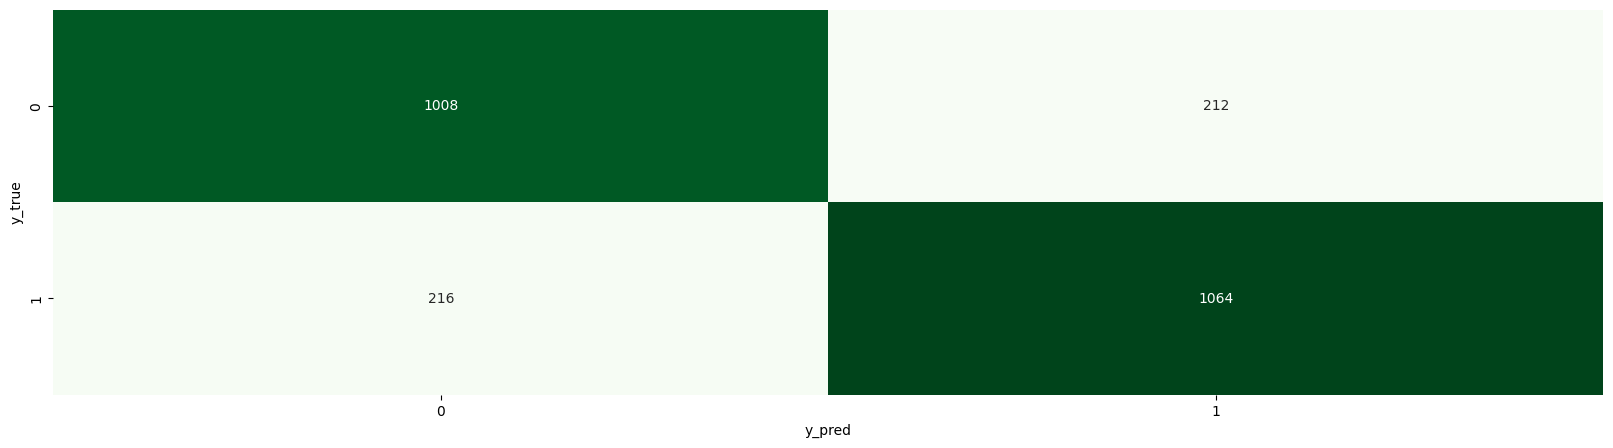

In [98]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.heatmap(confusion_matrix(ytest,y_predict),annot = True,cmap="Greens", fmt = ".0f",cbar=False)
plt.xlabel("y_pred")
plt.ylabel("y_true");